# Intro to Web Scraping

## Question: What is the average height/weight by class for the Bryant Bulldogs Men's Basketball Team?

This program will scrape data for the Bryant University mens basketball team (from bryantbulldogs.com)

In [158]:
!pip install BeautifulSoup4

## Attempt #1
This is a basic call using a bare bones beautiful soup request


In [1]:
from bs4 import BeautifulSoup
import requests

url="https://bryantbulldogs.com/sports/mbkb/2021-22/roster"

html_content = requests.get(url)

soup = BeautifulSoup(html_content, "html.parser")
print(soup.prettify())

TypeError: object of type 'Response' has no len()

The above error is telling us that the html_content is of type response and can't be passed in entirety to the html.parser. 

## Attempt #2
We'll use just the .text from the html_content.

In [2]:
from bs4 import BeautifulSoup
import requests

url="https://bryantbulldogs.com/sports/mbkb/2021-22/roster"

html_content = requests.get(url)

soup = BeautifulSoup(html_content.text, "html.parser")
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   ERROR: The request could not be satisfied
  </title>
 </head>
 <body>
  <h1>
   403 ERROR
  </h1>
  <h2>
   The request could not be satisfied.
  </h2>
  <hr noshade="" size="1px"/>
  Request blocked.
We can't connect to the server for this app or website at this time. There might be too much traffic or a configuration error. Try again later, or contact the app or website owner.
  <br clear="all"/>
  If you provide content to customers through CloudFront, you can find steps to troubleshoot and help prevent this error by reviewing the CloudFront documentation.
  <br clear="all"/>
  <hr noshade="" size="1px"/>
  <pre>
Generated by cloudfront (CloudFront)
Request ID: 4ExgWPhZ7bTAVGDKjAESnEb0h5HwLrcZWTXeMVtVoPNrr01yrSuR2w==
</pre>
  <address>
  </address>
 </body>
</html>


Now we are getting a Request Blocked error. This is because the website recognizes that it isn't a web browser making the request.

## Attempt #3 

We'll "fool" the website into thinking that we are a web browser using our header info

In [3]:
#from bs4 import BeautifulSoup
#import requests

url="https://bryantbulldogs.com/sports/mbkb/2021-22/roster"

headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'
    }

html_content = requests.get(url, headers=headers)

soup = BeautifulSoup(html_content.text, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="internal-page" data-theme="hattrick" lang="en">
 <head>
  <title>
   2021-22 Bryant Men's Basketball Roster -  Bryant University Bulldogs
  </title>
  <meta content="The official $pageDescription" property="description"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="/assets/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/assets/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/assets/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/assets/favicons/site.webmanifest" rel="manifest"/>
  <link color="#000" href="/assets/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  <link href="/assets/favicons/favicon.ico" rel="shortcut icon"/>
  <meta content="#000" name="msapplication-TileColor"/>
  <meta content="/assets/favicons/brows

Now we are getting all the info from the website, but we really only care about the data that is in the table.

It is very easy to push table data directly into a Pandas dataframe.

In [29]:
# Let's extract the data that is in the table and put it into a dataframe
import pandas as pd

table = soup.find_all('table')

# extract the first table

df = pd.read_html(str(table))[0]

In [18]:
df.head()  # an additional column was read into the dataframe

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,Unnamed: 7
0,1.0,No.: 1,Joe Moon IV,Cl.: So.,Pos.: Guard,Ht.: 6-2,Wt.: 190,"Hometown/High School: Detroit, Mich. / Wood..."
1,2.0,No.: 2,Erickson Bans,Cl.: So.,Pos.: Guard,Ht.: 5-11,Wt.: 175,"Hometown/High School: Pawtucket, R.I. / Shea"
2,3.0,No.: 3,Adham Eleeda,Cl.: Sr.,Pos.: Guard,Ht.: 6-5,Wt.: 210,"Hometown/High School: Toronto, Ont. / Toron..."
3,4.0,No.: 4,Tyler Brelsford,Cl.: Fr.,Pos.: Guard,Ht.: 6-4,Wt.: 183,"Hometown/High School: Ellicott City, Md. / ..."
4,5.0,No.: 5,Charles Pride,Cl.: Jr.,Pos.: Guard,Ht.: 6-4,Wt.: 200,"Hometown/High School: Syracuse, N.Y. / Putn..."


In [30]:
columns=list(df.columns)

columns.pop(-1) # remove the last label

df.drop("No.", axis=1, inplace=True) # drop column No. 


In [23]:
df.head()

,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,Unnamed: 7
0,No.: 1,Joe Moon IV,Cl.: So.,Pos.: Guard,Ht.: 6-2,Wt.: 190,"Hometown/High School: Detroit, Mich. / Wood..."
1,No.: 2,Erickson Bans,Cl.: So.,Pos.: Guard,Ht.: 5-11,Wt.: 175,"Hometown/High School: Pawtucket, R.I. / Shea"
2,No.: 3,Adham Eleeda,Cl.: Sr.,Pos.: Guard,Ht.: 6-5,Wt.: 210,"Hometown/High School: Toronto, Ont. / Toron..."
3,No.: 4,Tyler Brelsford,Cl.: Fr.,Pos.: Guard,Ht.: 6-4,Wt.: 183,"Hometown/High School: Ellicott City, Md. / ..."
4,No.: 5,Charles Pride,Cl.: Jr.,Pos.: Guard,Ht.: 6-4,Wt.: 200,"Hometown/High School: Syracuse, N.Y. / Putn..."


In [24]:
columns

['No.', 'Name', 'Cl.', 'Pos.', 'Ht.', 'Wt.', 'Hometown/High School']

In [31]:
df.set_axis(columns, axis=1, inplace=True)

In [32]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School
0,No.: 1,Joe Moon IV,Cl.: So.,Pos.: Guard,Ht.: 6-2,Wt.: 190,"Hometown/High School: Detroit, Mich. / Wood..."
1,No.: 2,Erickson Bans,Cl.: So.,Pos.: Guard,Ht.: 5-11,Wt.: 175,"Hometown/High School: Pawtucket, R.I. / Shea"
2,No.: 3,Adham Eleeda,Cl.: Sr.,Pos.: Guard,Ht.: 6-5,Wt.: 210,"Hometown/High School: Toronto, Ont. / Toron..."
3,No.: 4,Tyler Brelsford,Cl.: Fr.,Pos.: Guard,Ht.: 6-4,Wt.: 183,"Hometown/High School: Ellicott City, Md. / ..."
4,No.: 5,Charles Pride,Cl.: Jr.,Pos.: Guard,Ht.: 6-4,Wt.: 200,"Hometown/High School: Syracuse, N.Y. / Putn..."


## Let's get a summary of how many players we have by class (Freshman, Sophomore, etc)

In [34]:
# You can see that our fields also have the labels. We'll have to strip those out.
status = df["Cl."].str.split(" ", n = 1, expand = True)
status.head()

,0,1
0,Cl.:,So.
1,Cl.:,So.
2,Cl.:,Sr.
3,Cl.:,Fr.
4,Cl.:,Jr.


In [35]:
# Now let's overwrite the class with just the class (no label)
df['Cl.'] = status[1]

In [36]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,Ht.: 6-2,Wt.: 190,"Hometown/High School: Detroit, Mich. / Wood..."
1,No.: 2,Erickson Bans,So.,Pos.: Guard,Ht.: 5-11,Wt.: 175,"Hometown/High School: Pawtucket, R.I. / Shea"
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,Ht.: 6-5,Wt.: 210,"Hometown/High School: Toronto, Ont. / Toron..."
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,Ht.: 6-4,Wt.: 183,"Hometown/High School: Ellicott City, Md. / ..."
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,Ht.: 6-4,Wt.: 200,"Hometown/High School: Syracuse, N.Y. / Putn..."


In [37]:
df['Cl.'].value_counts()

 Fr.    6
 Sr.    4
 Jr.    4
 So.    3
 Gr.    1
 4th    1
Name: Cl., dtype: int64

In [38]:
# What if we wanted to see average height and weight for each class (are the players getting bigger or smaller?)

# Let's start by removing the labels for those other fields
height = df["Ht."].str.split(" ", n = 1, expand = True)
weight = df["Wt."].str.split(" ", n = 1, expand = True)

df['Ht.'] = height[1]
df['Wt.'] = weight[1]

df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,6-2,190,"Hometown/High School: Detroit, Mich. / Wood..."
1,No.: 2,Erickson Bans,So.,Pos.: Guard,5-11,175,"Hometown/High School: Pawtucket, R.I. / Shea"
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,6-5,210,"Hometown/High School: Toronto, Ont. / Toron..."
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,6-4,183,"Hometown/High School: Ellicott City, Md. / ..."
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,6-4,200,"Hometown/High School: Syracuse, N.Y. / Putn..."


In [39]:
df.groupby('Cl.')['Wt.'].mean()

TypeError: Could not convert  183 157 185 225 180 220 to numeric

In [40]:
# Hmmm... it is telling us the data isn't a type numeric. Let's see what types we have
df.dtypes

No.                     object
Name                    object
Cl.                     object
Pos.                    object
Ht.                     object
Wt.                     object
Hometown/High School    object
dtype: object

In [41]:
# type object means it's text (not numeric)
# Let's change them to a numeric type
df['Wt.'] = pd.to_numeric(df['Wt.'])

In [42]:
df.dtypes

No.                      object
Name                     object
Cl.                      object
Pos.                     object
Ht.                      object
Wt.                     float64
Hometown/High School     object
dtype: object

In [43]:
df.groupby('Cl.')['Wt.'].mean()

Cl.
 4th           NaN
 Fr.    191.666667
 Gr.    235.000000
 Jr.    194.000000
 So.    193.333333
 Sr.    213.750000
Name: Wt., dtype: float64

In [46]:
df.groupby(['Cl.', 'Pos.'])['Wt.'].mean().unstack()

Pos.,Pos.: F,Pos.: Forward,Pos.: G,Pos.: Guard
Cl.,,,,
4th,NaN,NaN,NaN,NaN
Fr.,220.0,205.0,NaN,173.333333
Gr.,NaN,235.0,NaN,NaN
Jr.,210.0,NaN,186.0,190.000000
So.,NaN,NaN,215.0,182.500000
Sr.,NaN,230.0,NaN,208.333333


In [47]:
# However, we can't just convert the height to a numeric since it is in the format feet-inches.
# If we want to take the average of the height then we have to convert it into a single #. So let's convert it all to total inches

# Start by splitting it into a Feet Column and Inches column
# You'll notice that this time we are splitting on the "-"
height = df["Ht."].str.split("-", n = 1, expand = True)
height.head()

,0,1
0,6,2
1,5,11
2,6,5
3,6,4
4,6,4


In [48]:
df['Ht_Feet'] = height[0]
df['Ht_Inches'] = height[1]

In [49]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,Ht_Feet,Ht_Inches
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,6-2,190.0,"Hometown/High School: Detroit, Mich. / Wood...",6,2
1,No.: 2,Erickson Bans,So.,Pos.: Guard,5-11,175.0,"Hometown/High School: Pawtucket, R.I. / Shea",5,11
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,6-5,210.0,"Hometown/High School: Toronto, Ont. / Toron...",6,5
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,6-4,183.0,"Hometown/High School: Ellicott City, Md. / ...",6,4
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,6-4,200.0,"Hometown/High School: Syracuse, N.Y. / Putn...",6,4


In [50]:
df.dtypes

No.                      object
Name                     object
Cl.                      object
Pos.                     object
Ht.                      object
Wt.                     float64
Hometown/High School     object
Ht_Feet                  object
Ht_Inches                object
dtype: object

In [51]:
df['Height'] =df['Ht_Feet'].astype(int) * 12 + df['Ht_Inches'].astype(int)

In [52]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,Ht_Feet,Ht_Inches,Height
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,6-2,190.0,"Hometown/High School: Detroit, Mich. / Wood...",6,2,74
1,No.: 2,Erickson Bans,So.,Pos.: Guard,5-11,175.0,"Hometown/High School: Pawtucket, R.I. / Shea",5,11,71
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,6-5,210.0,"Hometown/High School: Toronto, Ont. / Toron...",6,5,77
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,6-4,183.0,"Hometown/High School: Ellicott City, Md. / ...",6,4,76
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,6-4,200.0,"Hometown/High School: Syracuse, N.Y. / Putn...",6,4,76


In [53]:
# Now we can find the average (if we don't specify a field then we get the mean for all numeric fields)
df.groupby('Cl.').mean()

,Wt.,Height
Cl.,,
4th,NaN,50.000000
Fr.,191.666667,75.666667
Gr.,235.000000,80.000000
Jr.,194.000000,76.000000
So.,193.333333,73.666667
Sr.,213.750000,78.000000


In [54]:
# Let's drop the Height temporary columns
df.drop(columns=['Ht_Feet', 'Ht_Inches'], inplace=True)

In [55]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,Height
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,6-2,190.0,"Hometown/High School: Detroit, Mich. / Wood...",74
1,No.: 2,Erickson Bans,So.,Pos.: Guard,5-11,175.0,"Hometown/High School: Pawtucket, R.I. / Shea",71
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,6-5,210.0,"Hometown/High School: Toronto, Ont. / Toron...",77
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,6-4,183.0,"Hometown/High School: Ellicott City, Md. / ...",76
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,6-4,200.0,"Hometown/High School: Syracuse, N.Y. / Putn...",76


In [56]:
df.groupby('Cl.').mean()

,Wt.,Height
Cl.,,
4th,NaN,50.000000
Fr.,191.666667,75.666667
Gr.,235.000000,80.000000
Jr.,194.000000,76.000000
So.,193.333333,73.666667
Sr.,213.750000,78.000000


In [57]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,Height
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,6-2,190.0,"Hometown/High School: Detroit, Mich. / Wood...",74
1,No.: 2,Erickson Bans,So.,Pos.: Guard,5-11,175.0,"Hometown/High School: Pawtucket, R.I. / Shea",71
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,6-5,210.0,"Hometown/High School: Toronto, Ont. / Toron...",77
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,6-4,183.0,"Hometown/High School: Ellicott City, Md. / ...",76
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,6-4,200.0,"Hometown/High School: Syracuse, N.Y. / Putn...",76


In [60]:
#save the result into a csv file

df.to_csv('data/basketball_player_2021-2022.csv', index=False)

# In class exerise

  Find number of players by state and by city

In [2]:
import pandas as pd
df=pd.read_csv('data/basketball_player_2021-2022.csv')
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,Height
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,6-2,190.0,"Hometown/High School: Detroit, Mich. / Wood...",74
1,No.: 2,Erickson Bans,So.,Pos.: Guard,5-11,175.0,"Hometown/High School: Pawtucket, R.I. / Shea",71
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,6-5,210.0,"Hometown/High School: Toronto, Ont. / Toron...",77
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,6-4,183.0,"Hometown/High School: Ellicott City, Md. / ...",76
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,6-4,200.0,"Hometown/High School: Syracuse, N.Y. / Putn...",76


In [4]:
df['hometown_highschool']=df['Hometown/High School'].str.split(":", n=1, expand=True)[1]

df['hometown_highschool']

0          Detroit, Mich.  /  Woodstock Academy (Conn.)
1                              Pawtucket, R.I.  /  Shea
2       Toronto, Ont.  /  Toronto Basketball Academy...
3       Ellicott City, Md.  /  Mount Saint Joseph (G...
4             Syracuse, N.Y.  /  Putnam Science (Conn.)
5           Merida, Venezuela  /  Sagemont School (UAB)
6                   Bergenfield, N.J.  /  Frisch School
7                       Westbury, N.Y.  /  Holy Trinity
8                    Weymouth, Mass.  /  Thayer Academy
9               Nahant, Mass.  /  The Governors Academy
10                  Mount Vernon, N.Y.  /  Mount Vernon
11         New York, N.Y.  /  Notre Dame Prep (Rutgers)
12             Pittsburgh, Pa.  /  First Love Christian
13      Valley Stream, N.Y.  /  Valley Stream South ...
14           Johannesburg, South Africa  /  IMG Academy
15      Kinshasa, D.R. Congo  /  Middleburg Academy ...
16      Washington, D.C.  /  Orr (Ill.) Academy (La ...
17      Fairfax, Va.  /  Paul VI (Stony Brook, B

In [6]:
df['highschool']=df['hometown_highschool'].str.split("/", n=1, expand=True)[1]
df['statecity']=df['hometown_highschool'].str.split("/", n=1, expand=True)[0]

df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,Height,highschool,hometown_highschool,statecity
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,6-2,190.0,"Hometown/High School: Detroit, Mich. / Wood...",74,Woodstock Academy (Conn.),"Detroit, Mich. / Woodstock Academy (Conn.)","Detroit, Mich."
1,No.: 2,Erickson Bans,So.,Pos.: Guard,5-11,175.0,"Hometown/High School: Pawtucket, R.I. / Shea",71,Shea,"Pawtucket, R.I. / Shea","Pawtucket, R.I."
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,6-5,210.0,"Hometown/High School: Toronto, Ont. / Toron...",77,Toronto Basketball Academy (Northern Kentucky),"Toronto, Ont. / Toronto Basketball Academy...","Toronto, Ont."
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,6-4,183.0,"Hometown/High School: Ellicott City, Md. / ...",76,Mount Saint Joseph (George Washington),"Ellicott City, Md. / Mount Saint Joseph (G...","Ellicott City, Md."
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,6-4,200.0,"Hometown/High School: Syracuse, N.Y. / Putn...",76,Putnam Science (Conn.),"Syracuse, N.Y. / Putnam Science (Conn.)","Syracuse, N.Y."


In [7]:
df['state']=df['statecity'].str.split(",", n=1, expand=True)[1]
df['city']=df['statecity'].str.split(",", n=1, expand=True)[0]
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,Height,highschool,hometown_highschool,statecity,state,city
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,6-2,190.0,"Hometown/High School: Detroit, Mich. / Wood...",74,Woodstock Academy (Conn.),"Detroit, Mich. / Woodstock Academy (Conn.)","Detroit, Mich.",Mich.,Detroit
1,No.: 2,Erickson Bans,So.,Pos.: Guard,5-11,175.0,"Hometown/High School: Pawtucket, R.I. / Shea",71,Shea,"Pawtucket, R.I. / Shea","Pawtucket, R.I.",R.I.,Pawtucket
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,6-5,210.0,"Hometown/High School: Toronto, Ont. / Toron...",77,Toronto Basketball Academy (Northern Kentucky),"Toronto, Ont. / Toronto Basketball Academy...","Toronto, Ont.",Ont.,Toronto
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,6-4,183.0,"Hometown/High School: Ellicott City, Md. / ...",76,Mount Saint Joseph (George Washington),"Ellicott City, Md. / Mount Saint Joseph (G...","Ellicott City, Md.",Md.,Ellicott City
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,6-4,200.0,"Hometown/High School: Syracuse, N.Y. / Putn...",76,Putnam Science (Conn.),"Syracuse, N.Y. / Putnam Science (Conn.)","Syracuse, N.Y.",N.Y.,Syracuse


In [10]:
df.drop(columns=['Hometown/High School', 'hometown_highschool', 'statecity'], index=1, inplace=True)

In [13]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Height,highschool,state,city
0,No.: 1,Joe Moon IV,So.,Pos.: Guard,6-2,190.0,74,Woodstock Academy (Conn.),Mich.,Detroit
2,No.: 3,Adham Eleeda,Sr.,Pos.: Guard,6-5,210.0,77,Toronto Basketball Academy (Northern Kentucky),Ont.,Toronto
3,No.: 4,Tyler Brelsford,Fr.,Pos.: Guard,6-4,183.0,76,Mount Saint Joseph (George Washington),Md.,Ellicott City
4,No.: 5,Charles Pride,Jr.,Pos.: Guard,6-4,200.0,76,Putnam Science (Conn.),N.Y.,Syracuse
5,No.: 10,Luis Hurtado Jr.,Sr.,Pos.: Guard,6-6,215.0,78,Sagemont School (UAB),Venezuela,Merida


In [20]:
# number of players by state and by city
df.groupby(['state', 'city'])['Name'].count().reset_index(name='counts')

,state,city,counts
0,D.C.,Washington,1
1,D.R. Congo,Kinshasa,1
2,Mass.,Nahant,1
3,Mass.,Weymouth,1
4,Md.,Ellicott City,1
5,Mich.,Detroit,1
6,N.J.,Bergenfield,1
7,N.Y.,Mount Vernon,1
8,N.Y.,New York,1
9,N.Y.,Syracuse,1


## extract the player rosters from all years.

In [148]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


years=['1991-92', '1994-95', '1998-99', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']


for year in years:

    url="https://bryantbulldogs.com/sports/mbkb/"+year+"/roster"

    headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'
    }

    html_content = requests.get(url, headers=headers)

    soup = BeautifulSoup(html_content.text, "html.parser")
   
    table = soup.find_all('table')

    df = pd.read_html(str(table))[0] # extract the first table
    
    columns=list(df.columns)

    columns.pop(-1) # remove the last label

    df.drop("No.", axis=1, inplace=True) # drop column No. 
    
    df.set_axis(columns, axis=1, inplace=True)
    
    df['year']=year  # add year to the table
    
    if year=='1991-92':
        total_df=df
    else:
        total_df=pd.concat([total_df, df])   
        

In [150]:
total_df.groupby('year')['year'].count()

year
1991-92    15
1994-95    12
1998-99    16
2000-01    13
2001-02    11
2002-03    15
2003-04    17
2004-05    19
2005-06    17
2006-07    13
2007-08    13
2008-09    18
2009-10    18
2010-11    16
2011-12    14
2012-13    16
2013-14    16
2014-15    14
2015-16    14
2016-17    15
2017-18    14
2018-19    14
2019-20    17
2020-21    16
2021-22    19
Name: year, dtype: int64

In [152]:
#save the result into a csv file

total_df.to_csv('data/basketball_player_1991_2022.csv', index=False)

## Take home question: 

What is the average height/weight by class for the Bryant Bulldogs Men's Basketball Team over the year?

what is the number of players by country and state over the year?

In [43]:
df=pd.read_csv('data/basketball_player_1991_2022.csv')

In [24]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,year
0,No.: 10,Matt Dawes,Cl.: FR,Pos.: G,Ht.: 5-7,Wt.: 155,"Hometown/High School: Stratford, CT / Fairf...",1991-92
1,No.: 11,Matt Kuss,Cl.: FR,Pos.: G,Ht.: 5-11,Wt.: 185,"Hometown/High School: Fall River, MA / Durfee",1991-92
2,No.: 12,Glenn Tatro,Cl.: SO,Pos.: G,Ht.: 5-11,Wt.: 180,"Hometown/High School: North Adams, MA / Drury",1991-92
3,No.: 14,Colin Lawson,Cl.: SO,Pos.: G,Ht.: 5-9,Wt.: 160,"Hometown/High School: Cambridge, MA / Rindg...",1991-92
4,No.: 21,Chris Berntsen,Cl.: FR,Pos.: F,Ht.: 6-5,Wt.: 185,"Hometown/High School: Staten Island, NY / F...",1991-92


In [46]:
df['Weight']=df['Wt.'].str.split(" ", n=1, expand=True)[1]

df['Weight']=pd.to_numeric(df['Weight'])

In [54]:
df_avgWeight=df.groupby(['year'])['Weight'].mean().reset_index(name='average_weight')
df_avgWeight

,year,average_weight
0,1991-92,198.666667
1,1994-95,189.166667
2,1998-99,199.062500
3,2000-01,195.384615
4,2001-02,193.636364
5,2002-03,183.333333
6,2003-04,183.571429
7,2004-05,187.000000
8,2005-06,190.384615
9,2006-07,191.923077


<AxesSubplot:xlabel='year', ylabel='average_weight'>

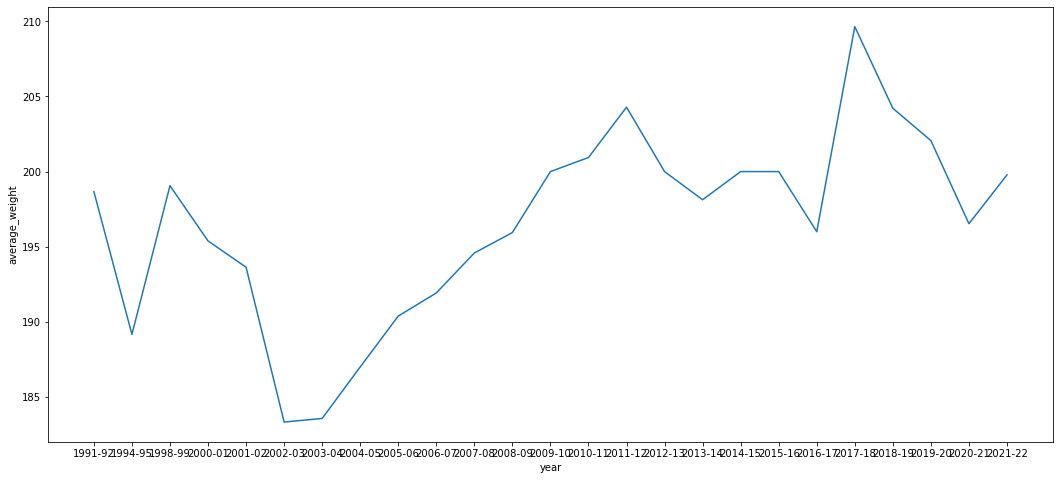

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams["figure.figsize"] = [18,8]

sns.lineplot(data=df_avgWeight, x="year", y="average_weight")

In [67]:
# revise year column only show starting year

df_avgWeight['year_r']=df_avgWeight['year'].str.split("-", n=2, expand=True)[0]
df_avgWeight.head()

,year,average_weight,year_r
0,1991-92,198.666667,1991
1,1994-95,189.166667,1994
2,1998-99,199.062500,1998
3,2000-01,195.384615,2000
4,2001-02,193.636364,2001


<AxesSubplot:xlabel='year_r', ylabel='average_weight'>

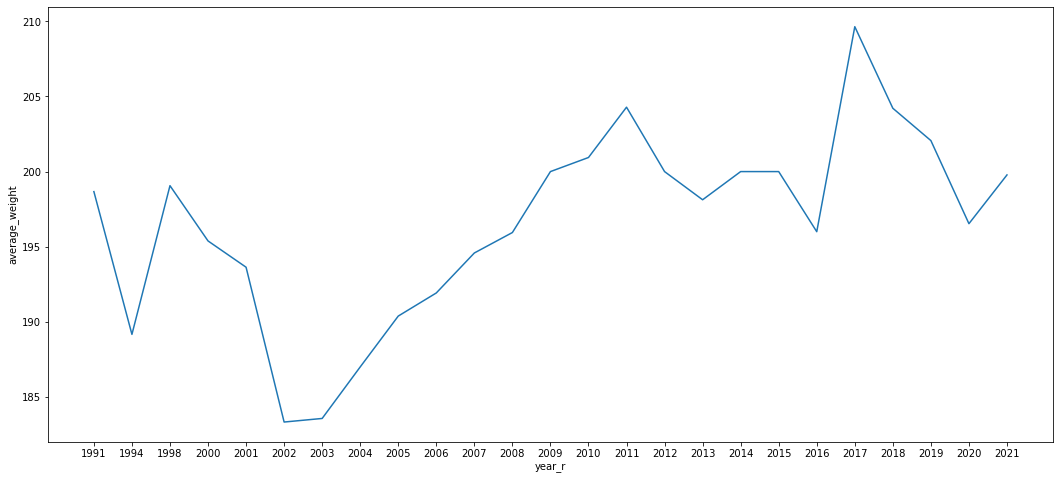

In [68]:
sns.lineplot(data=df_avgWeight, x="year_r", y="average_weight")

In [69]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,year,Weight,year_r
0,No.: 10,Matt Dawes,Cl.: FR,Pos.: G,Ht.: 5-7,Wt.: 155,"Hometown/High School: Stratford, CT / Fairf...",1991-92,155.0,1991
1,No.: 11,Matt Kuss,Cl.: FR,Pos.: G,Ht.: 5-11,Wt.: 185,"Hometown/High School: Fall River, MA / Durfee",1991-92,185.0,1991
2,No.: 12,Glenn Tatro,Cl.: SO,Pos.: G,Ht.: 5-11,Wt.: 180,"Hometown/High School: North Adams, MA / Drury",1991-92,180.0,1991
3,No.: 14,Colin Lawson,Cl.: SO,Pos.: G,Ht.: 5-9,Wt.: 160,"Hometown/High School: Cambridge, MA / Rindg...",1991-92,160.0,1991
4,No.: 21,Chris Berntsen,Cl.: FR,Pos.: F,Ht.: 6-5,Wt.: 185,"Hometown/High School: Staten Island, NY / F...",1991-92,185.0,1991


In [102]:
df['height_feet']=df['Ht.'].str.split(": ", n=2, expand=True)[1].str.split("-", n=2, expand=True)[0]
df['height_int']=df['Ht.'].str.split(": ", n=2, expand=True)[1].str.split("-", n=2, expand=True)[1]

df['height_feet']=pd.to_numeric(df['height_feet'])
df['height_int']=pd.to_numeric(df['height_int'])

In [103]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,year,Weight,year_r,height,height_feet,height_int
0,No.: 10,Matt Dawes,Cl.: FR,Pos.: G,Ht.: 5-7,Wt.: 155,"Hometown/High School: Stratford, CT / Fairf...",1991-92,155.0,1991,67.0,5.0,7.0
1,No.: 11,Matt Kuss,Cl.: FR,Pos.: G,Ht.: 5-11,Wt.: 185,"Hometown/High School: Fall River, MA / Durfee",1991-92,185.0,1991,71.0,5.0,11.0
2,No.: 12,Glenn Tatro,Cl.: SO,Pos.: G,Ht.: 5-11,Wt.: 180,"Hometown/High School: North Adams, MA / Drury",1991-92,180.0,1991,71.0,5.0,11.0
3,No.: 14,Colin Lawson,Cl.: SO,Pos.: G,Ht.: 5-9,Wt.: 160,"Hometown/High School: Cambridge, MA / Rindg...",1991-92,160.0,1991,69.0,5.0,9.0
4,No.: 21,Chris Berntsen,Cl.: FR,Pos.: F,Ht.: 6-5,Wt.: 185,"Hometown/High School: Staten Island, NY / F...",1991-92,185.0,1991,77.0,6.0,5.0


In [104]:
df.dtypes

No.                      object
Name                     object
Cl.                      object
Pos.                     object
Ht.                      object
Wt.                      object
Hometown/High School     object
year                     object
Weight                  float64
year_r                   object
height                  float64
height_feet             float64
height_int              float64
dtype: object

In [105]:
df['height']=df['height_feet']*12+df['height_int']

In [106]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,year,Weight,year_r,height,height_feet,height_int
0,No.: 10,Matt Dawes,Cl.: FR,Pos.: G,Ht.: 5-7,Wt.: 155,"Hometown/High School: Stratford, CT / Fairf...",1991-92,155.0,1991,67.0,5.0,7.0
1,No.: 11,Matt Kuss,Cl.: FR,Pos.: G,Ht.: 5-11,Wt.: 185,"Hometown/High School: Fall River, MA / Durfee",1991-92,185.0,1991,71.0,5.0,11.0
2,No.: 12,Glenn Tatro,Cl.: SO,Pos.: G,Ht.: 5-11,Wt.: 180,"Hometown/High School: North Adams, MA / Drury",1991-92,180.0,1991,71.0,5.0,11.0
3,No.: 14,Colin Lawson,Cl.: SO,Pos.: G,Ht.: 5-9,Wt.: 160,"Hometown/High School: Cambridge, MA / Rindg...",1991-92,160.0,1991,69.0,5.0,9.0
4,No.: 21,Chris Berntsen,Cl.: FR,Pos.: F,Ht.: 6-5,Wt.: 185,"Hometown/High School: Staten Island, NY / F...",1991-92,185.0,1991,77.0,6.0,5.0


In [109]:
df_avgHeight=df.groupby('year_r')['height'].mean().reset_index(name="avg_height")

In [110]:
df_avgHeight.head()

,year_r,avg_height
0,1991,75.600000
1,1994,75.000000
2,1998,75.375000
3,2000,75.692308
4,2001,75.909091


<AxesSubplot:xlabel='year_r', ylabel='avg_height'>

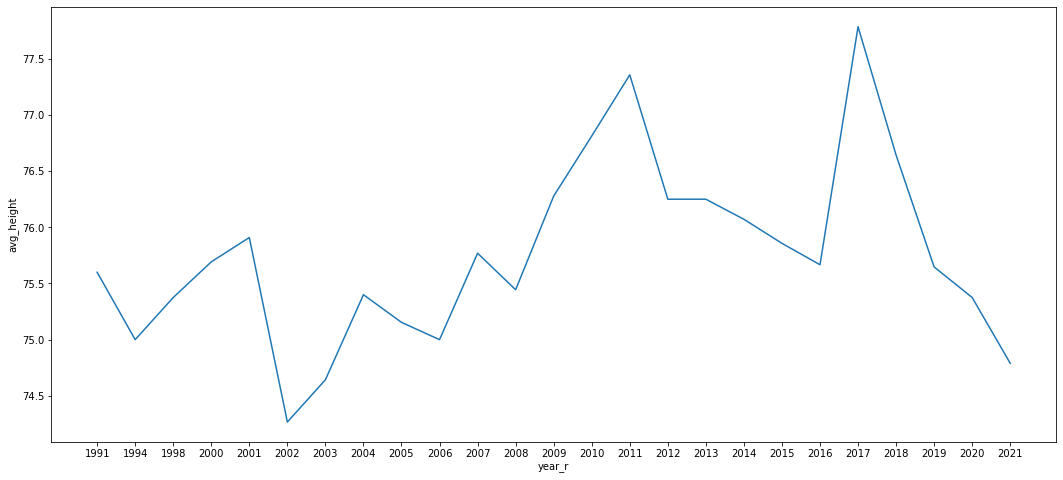

In [111]:
sns.lineplot(data=df_avgHeight, x="year_r", y="avg_height")

In [112]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,year,Weight,year_r,height,height_feet,height_int
0,No.: 10,Matt Dawes,Cl.: FR,Pos.: G,Ht.: 5-7,Wt.: 155,"Hometown/High School: Stratford, CT / Fairf...",1991-92,155.0,1991,67.0,5.0,7.0
1,No.: 11,Matt Kuss,Cl.: FR,Pos.: G,Ht.: 5-11,Wt.: 185,"Hometown/High School: Fall River, MA / Durfee",1991-92,185.0,1991,71.0,5.0,11.0
2,No.: 12,Glenn Tatro,Cl.: SO,Pos.: G,Ht.: 5-11,Wt.: 180,"Hometown/High School: North Adams, MA / Drury",1991-92,180.0,1991,71.0,5.0,11.0
3,No.: 14,Colin Lawson,Cl.: SO,Pos.: G,Ht.: 5-9,Wt.: 160,"Hometown/High School: Cambridge, MA / Rindg...",1991-92,160.0,1991,69.0,5.0,9.0
4,No.: 21,Chris Berntsen,Cl.: FR,Pos.: F,Ht.: 6-5,Wt.: 185,"Hometown/High School: Staten Island, NY / F...",1991-92,185.0,1991,77.0,6.0,5.0


In [113]:
cols=['Weight', 'height']

In [127]:
# show average weight and height by year

df.groupby('year')['Weight', 'height'].mean()

C:\Users\sli\AppData\Local\Temp/ipykernel_10416/4202161280.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('year')['Weight', 'height'].mean()


,Weight,height
year,,
1991-92,198.666667,75.600000
1994-95,189.166667,75.000000
1998-99,199.062500,75.375000
2000-01,195.384615,75.692308
2001-02,193.636364,75.909091
2002-03,183.333333,74.266667
2003-04,183.571429,74.642857
2004-05,187.000000,75.400000
2005-06,190.384615,75.153846


In [128]:
df.head()

,No.,Name,Cl.,Pos.,Ht.,Wt.,Hometown/High School,year,Weight,year_r,height,height_feet,height_int
0,No.: 10,Matt Dawes,Cl.: FR,Pos.: G,Ht.: 5-7,Wt.: 155,"Hometown/High School: Stratford, CT / Fairf...",1991-92,155.0,1991,67.0,5.0,7.0
1,No.: 11,Matt Kuss,Cl.: FR,Pos.: G,Ht.: 5-11,Wt.: 185,"Hometown/High School: Fall River, MA / Durfee",1991-92,185.0,1991,71.0,5.0,11.0
2,No.: 12,Glenn Tatro,Cl.: SO,Pos.: G,Ht.: 5-11,Wt.: 180,"Hometown/High School: North Adams, MA / Drury",1991-92,180.0,1991,71.0,5.0,11.0
3,No.: 14,Colin Lawson,Cl.: SO,Pos.: G,Ht.: 5-9,Wt.: 160,"Hometown/High School: Cambridge, MA / Rindg...",1991-92,160.0,1991,69.0,5.0,9.0
4,No.: 21,Chris Berntsen,Cl.: FR,Pos.: F,Ht.: 6-5,Wt.: 185,"Hometown/High School: Staten Island, NY / F...",1991-92,185.0,1991,77.0,6.0,5.0


In [137]:
df['Hometown/High School'].str.split(": ", n=2, expand=True)

,0,1
0,Hometown/High School,"Stratford, CT / Fairfield Prep"
1,Hometown/High School,"Fall River, MA / Durfee"
2,Hometown/High School,"North Adams, MA / Drury"
3,Hometown/High School,"Cambridge, MA / Rindge & Latin"
4,Hometown/High School,"Staten Island, NY / Farrell"
...,...,...
377,Hometown/High School,"Johannesburg, South Africa / IMG Academy"
378,Hometown/High School,"Kinshasa, D.R. Congo / Middleburg Academy (..."
379,Hometown/High School,"Washington, D.C. / Orr (Ill.) Academy (La S..."
380,Hometown/High School,"Fairfax, Va. / Paul VI (Stony Brook, Bucknell)"


In [155]:
df['city']=df['Hometown/High School'].str.split(": ", n=2, expand=True)[1].str.split(", ", n=2, expand=True)[0]

df['state']=df['Hometown/High School'].str.split(": ", n=2, expand=True)[1].str.split(", ", n=2, expand=True)[1].str.split('/', n=2, expand=True)[0]

In [157]:
df['city'].value_counts().head(5)

 -  /  -       11
 Providence    10
 Boston         9
 Brooklyn       9
 Adelaide       9
Name: city, dtype: int64

In [158]:
df['state'].value_counts().head(5)

Mass.      50
N.Y.       36
MA         27
R.I.       23
Conn.      21
Name: state, dtype: int64

In [169]:
# display number of players by state and city

df.groupby(['state', 'city'])['Name'].count()

state        city       
Australia     Adelaide      9
              Melbourne     7
CA            Palmdale      3
CT            Bloomfield    3
              Bridgeport    1
                           ..
Va.           Franklin      4
              Lynchburg     3
Venezuela     Merida        2
Vt.           Burlington    4
Wash.         Tacoma        2
Name: Name, Length: 178, dtype: int64